# Часть №1. Общий анализ данных

In [1]:
import calendar
import locale
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.set_palette('Set2')
locale.setlocale(locale.LC_ALL, ('RU', 'UTF8'))

'ru_RU.UTF-8'

# 1. Загрузка данных

In [2]:
dtypes = {'publisher': 'category',
          'critic_score': 'int16',
          'critic_count': 'int16',
          'critic_positive': 'int16',
          'critic_mixed': 'int16',
          'critic_negative': 'int16',
          'user_score': 'float',
          'user_count': 'int16',
          'user_positive': 'int16',
          'user_mixed': 'int16',
          'user_negative': 'int16',          
          'developer': 'category',
          'rating': 'category'}

In [3]:
games = pd.read_csv('Data/metacritic.csv', sep=';', dtype=dtypes, parse_dates=['release_date'])
games['user_score'] = games['user_score'].replace(0, np.NaN)

In [4]:
games.head()

,title,platform,publisher,release_date,critic_score,critic_count,critic_positive,critic_mixed,critic_negative,user_score,...,developer,genre,players,rating,director,writer,composer,category,is_portable,is_exclusive
0,#IDARB,Xbox One,Other Ocean Interactive,2015-01-30,77,31,23,8,0,70.00,...,Other Ocean Interactive,NaN,NaN,NaN,NaN,NaN,NaN,75-89,0,1
1,#KILLALLZOMBIES,PlayStation 4,Beatshapers,2014-10-28,63,6,0,6,0,66.99,...,Beatshapers,NaN,NaN,NaN,NaN,NaN,NaN,50-74,0,0
2,#KILLALLZOMBIES,Xbox One,Digerati Distribution,2016-08-10,53,9,0,6,3,NaN,...,Beatshapers,NaN,NaN,NaN,NaN,NaN,NaN,50-74,0,0
3,'Splosion Man,Xbox 360,Twisted Pixel Games,2009-07-22,84,52,48,4,0,78.01,...,Twisted Pixel Games,"Action, Platformer, General, 2D",1-4,E10+,NaN,NaN,NaN,75-89,0,1
4,'n Verlore Verstand,Xbox One,Skobbejak Games,2017-04-21,57,4,0,4,0,NaN,...,Skobbejak Games,"Adventure, First-Person, 3D",No Online Multiplayer,E,NaN,NaN,NaN,50-74,0,0


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20009 entries, 0 to 20008
Data columns (total 24 columns):
title              20009 non-null object
platform           20009 non-null object
publisher          20009 non-null category
release_date       20009 non-null datetime64[ns]
critic_score       20009 non-null int16
critic_count       20009 non-null int16
critic_positive    20009 non-null int16
critic_mixed       20009 non-null int16
critic_negative    20009 non-null int16
user_score         17158 non-null float64
user_count         20009 non-null int16
user_positive      20009 non-null int16
user_mixed         20009 non-null int16
user_negative      20009 non-null int16
developer          19974 non-null category
genre              11467 non-null object
players            12704 non-null object
rating             11459 non-null category
director           1437 non-null object
writer             690 non-null object
composer           784 non-null object
category           20009 non-

# 2. Подготовка данных

In [6]:
# Словарь русскоязычных наименований полей
columns_ru = {'title': 'Наименование', 'platform': 'Платформа',
              'publisher': 'Издатель', 'release_date': 'Дата выхода',
              'critic_score': 'Оценка', 'critic_count': 'Кол-во оценок',
              'critic_positive': 'Кол-во положительных оценок', 'critic_mixed': 'Кол-во смешанных оценок',
              'critic_negative': 'Кол-во негативных оценок', 'user_score': 'Оценка (пользов.)',
              'user_count': 'Кол-во оценок (пользов.)', 'user_positive': 'Кол-во положительных оценок (пользов.)',
              'user_positive': 'Кол-во положительных оценок (пользов.)', 'user_mixed': 'Кол-во смешанных оценок (пользов.)',
              'user_negative': 'Кол-во негативных оценок (пользов.)', 'developer': 'Разработчик',
              'genre': 'Жанр', 'players': 'Число игроков',
              'rating': 'Возрастной рейтинг', 'director': 'Режиссер',
              'writer': 'Сценарист', 'composer': 'Композитор',
              'year': 'Год', 'quarter': 'Квартал',
              'month': 'Месяц', 'weekday': 'День недели',
              'generation': 'Поколение', 'is_portable': 'Портативная',
              'is_exclusive': 'Эксклюзив'}

In [7]:
# Словарь игровых поколений
generations = {'Playstation': '5', 'Nintendo 64': '5',
              'Dreamcast': '6', 'PlayStation 2': '6', 'Gamecube': '6', 'Xbox': '6',
              'Xbox 360': '7', 'PlayStation 3': '7', 'Wii': '7',
              'Wii U': '8', 'PlayStation 4': '8', 'Xbox One': '8', 'Switch': '8',
              'GBA': '6', 'Playstation Portable': '7', 'DS': '7',
              '3DS': '8', 'PlayStation Vita': '8', 'PC': 'PC'}

In [8]:
# Создание новых полей
games['year'] = games['release_date'].dt.year
games['quarter'] = games['release_date'].dt.quarter
games['month'] = games['release_date'].dt.month
games['weekday'] = games['release_date'].dt.weekday
games['generation'] = games['platform'].map(generations)

In [9]:
games.head()

,title,platform,publisher,release_date,critic_score,critic_count,critic_positive,critic_mixed,critic_negative,user_score,...,writer,composer,category,is_portable,is_exclusive,year,quarter,month,weekday,generation
0,#IDARB,Xbox One,Other Ocean Interactive,2015-01-30,77,31,23,8,0,70.00,...,NaN,NaN,75-89,0,1,2015,1,1,4,8
1,#KILLALLZOMBIES,PlayStation 4,Beatshapers,2014-10-28,63,6,0,6,0,66.99,...,NaN,NaN,50-74,0,0,2014,4,10,1,8
2,#KILLALLZOMBIES,Xbox One,Digerati Distribution,2016-08-10,53,9,0,6,3,NaN,...,NaN,NaN,50-74,0,0,2016,3,8,2,8
3,'Splosion Man,Xbox 360,Twisted Pixel Games,2009-07-22,84,52,48,4,0,78.01,...,NaN,NaN,75-89,0,1,2009,3,7,2,7
4,'n Verlore Verstand,Xbox One,Skobbejak Games,2017-04-21,57,4,0,4,0,NaN,...,NaN,NaN,50-74,0,0,2017,2,4,4,8


# 3. Описательный анализ данных

## 3.1. Общая статистика

In [10]:
# Основные статистические показатели
df = games.describe().iloc[[0, 3, 7, 1, 5], :].T
df.columns = ['Количество', 'Минимум', 'Максимум', 'Среднее', 'Медиана']
df['Мода'] = [games[index].value_counts().index[0] for index, row in df.iterrows()]
df.iloc[: 12, :].rename(columns_ru, axis=0).apply(lambda x: round(x, 2))

,Количество,Минимум,Максимум,Среднее,Медиана,Мода
Оценка,20009.0,8.0,99.00,68.79,71.00,73.00
Кол-во оценок,20009.0,3.0,118.00,19.62,14.00,4.00
Кол-во положительных оценок,20009.0,0.0,118.00,10.83,5.00,0.00
Кол-во смешанных оценок,20009.0,0.0,60.00,7.25,5.00,3.00
Кол-во негативных оценок,20009.0,0.0,43.00,1.54,0.00,0.00
Оценка (пользов.),17158.0,1.0,93.98,69.43,73.01,76.99
Кол-во оценок (пользов.),20009.0,0.0,4319.00,26.70,5.00,0.00
Кол-во положительных оценок (пользов.),20009.0,0.0,2729.00,16.24,3.00,0.00
Кол-во смешанных оценок (пользов.),20009.0,0.0,497.00,4.43,1.00,0.00
Кол-во негативных оценок (пользов.),20009.0,0.0,2550.00,6.03,1.00,0.00


/home/sergio/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/sergio/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


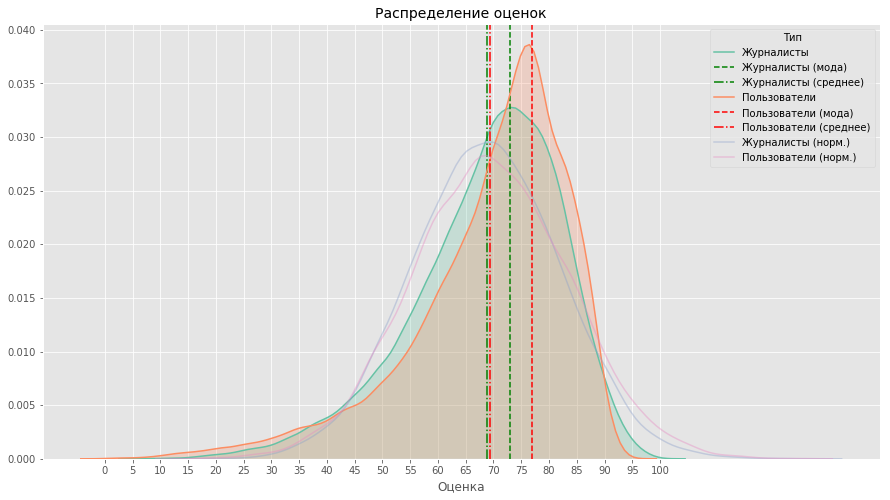

In [11]:
# Построение распределения оценок
df_1 = games['critic_score']
df_2 = games.query('user_score > 0')['user_score']
plt.figure(figsize=(15, 8)) 
g_1 = sns.kdeplot(df_1, shade=True, label='Журналисты');
plt.axvline(x=df_1.value_counts().index[0], c='green', linestyle='dashed', label='Журналисты (мода)');
plt.axvline(x=df_1.mean(), c='green', linestyle='-.', label='Журналисты (среднее)');
g_2 = sns.kdeplot(df_2, shade=True, label='Пользователи');
plt.axvline(x=df_2.value_counts().index[0], c='red', linestyle='dashed', label='Пользователи (мода)');
plt.axvline(x=df_2.mean(), c='red', linestyle='-.', label='Пользователи (среднее)');
g_3 = sns.kdeplot(np.random.normal(df_1.mean(), df_1.std(), 20000), alpha=0.4, label='Журналисты (норм.)');
g_4 = sns.kdeplot(np.random.normal(df_2.mean(), df_2.std(), 20000), alpha=0.4, label='Пользователи (норм.)');
plt.xticks((np.arange(0, 105, step=5)));
plt.xlabel("Оценка");
plt.ylabel(None);
plt.title("Распределение оценок", {'fontsize': 14});
plt.legend(title='Тип');

In [12]:
# Топ-20 самых высокооцененных журналистами игр
df = games.sort_values('critic_score', ascending=False) \
            .drop_duplicates(subset='title', keep='first')[['title', 'critic_score', 'platform', 'year']] \
            .reset_index(drop=True).head(20) \
            .rename(columns=columns_ru)
df.index += 1
df

,Наименование,Оценка,Платформа,Год
1,The Legend of Zelda: Ocarina of Time,99,Nintendo 64,1998
2,SoulCalibur,98,Dreamcast,1999
3,Grand Theft Auto IV,98,Xbox 360,2008
4,Tony Hawk's Pro Skater 2,98,Playstation,2000
5,Super Mario Galaxy,97,Wii,2007
6,Grand Theft Auto V,97,PlayStation 3,2013
7,Perfect Dark,97,Nintendo 64,2000
8,NFL 2K1,97,Dreamcast,2000
9,Red Dead Redemption 2,97,Xbox One,2018
10,Grand Theft Auto III,97,PlayStation 2,2001


In [13]:
# Топ-20 самых низкооцененных журналистами игр
df = games.sort_values('critic_score') \
            .drop_duplicates(subset='title', keep='first')[['title', 'critic_score', 'platform', 'year']] \
            .reset_index(drop=True).head(20) \
            .rename(columns=columns_ru)
df.index += 1
df

,Наименование,Оценка,Платформа,Год
1,Big Rigs: Over the Road Racing,8,PC,2003
2,Family Party: 30 Great Games Obstacle Arcade,11,Wii U,2012
3,Unearthed: Trail of Ibn Battuta,11,PlayStation 3,2013
4,Elf Bowling 1 & 2,12,DS,2005
5,Ride to Hell: Retribution,13,PlayStation 3,2013
6,The Letter,14,Wii U,2014
7,Orc Slayer,15,PlayStation 4,2016
8,101-in-1 Explosive Megamix,16,Wii,2011
9,NRA Varmint Hunter,16,PC,2004
10,Leisure Suit Larry: Box Office Bust,17,PlayStation 3,2009


In [14]:
# Топ-20 самых высокооцененных пользователями игр
df = games.sort_values('user_score', ascending=False) \
            .drop_duplicates(subset='title', keep='first')[['title', 'user_score', 'platform', 'year']] \
            .reset_index(drop=True).head(20) \
            .rename(columns=columns_ru)
df.index += 1
df

,Наименование,Оценка (пользов.),Платформа,Год
1,The Witcher 3: Wild Hunt,93.98,PC,2015
2,Resident Evil 4,92.97,Gamecube,2005
3,The Witcher 3: Wild Hunt - Hearts of Stone,92.97,Xbox One,2015
4,The Witcher 3: Wild Hunt - Blood and Wine,92.03,PC,2016
5,Xenogears,92.03,Playstation,1998
6,Xenoblade Chronicles,92.03,Wii,2012
7,Suikoden II,92.03,Playstation,1999
8,Metroid Prime,92.03,Gamecube,2002
9,Portal,92.03,PC,2007
10,Super Mario 64,92.03,Nintendo 64,1996


In [15]:
# Топ-20 самых низкооцененных пользователями игр
df = games.sort_values('user_score') \
            .drop_duplicates(subset='title', keep='first')[['title', 'user_score', 'platform', 'year']] \
            .query('user_score > 0').reset_index(drop=True).head(20) \
            .rename(columns=columns_ru)
df.index += 1
df

,Наименование,Оценка (пользов.),Платформа,Год
1,Enjoy your massage!,1.0,Wii,2010
2,ZEN Pinball 2: Ant-Man Pinball,2.0,PlayStation 4,2015
3,Nippon Marathon,2.0,PlayStation 4,2018
4,Ghostbusters,4.0,PC,2016
5,Hooters Road Trip,4.0,Playstation,2002
6,Pool Party,5.0,Wii,2007
7,ESPN NBA 2Night,7.0,Dreamcast,2000
8,Wallace & Gromit: Curse of the Were-Rabbit,7.0,Xbox,2005
9,Fast & Furious: Showdown,7.0,PlayStation 3,2013
10,Thrillville: Off the Rails,8.0,Playstation Portable,2007


## 3.2. Дата выхода

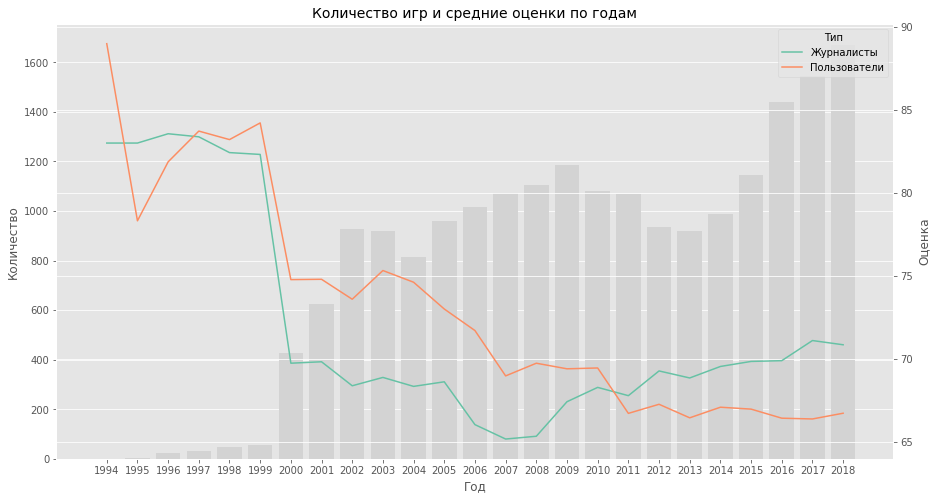

In [16]:
# Построение графиков количества игр и средних оценок по годам
df = games.groupby('year').agg({'title': 'count', 'critic_score': 'mean', 'user_score': 'mean'}).reset_index()
plt.figure(figsize=(15, 8))
g_1 = sns.barplot(x='year', y='title', data=df, color='lightgray')
g_1.set_xlabel('Год')
g_1.set_ylabel('Количество')
ax = g_1.twinx()
g_2 = sns.lineplot(ax.get_xticks(), y='critic_score', data=df, label='Журналисты')
g_2 = sns.lineplot(ax.get_xticks(), y='user_score', data=df, label='Пользователи')
g_2.set_ylabel('Оценка')
plt.title("Количество игр и средние оценки по годам", {'fontsize': 14});
plt.legend(title='Тип');

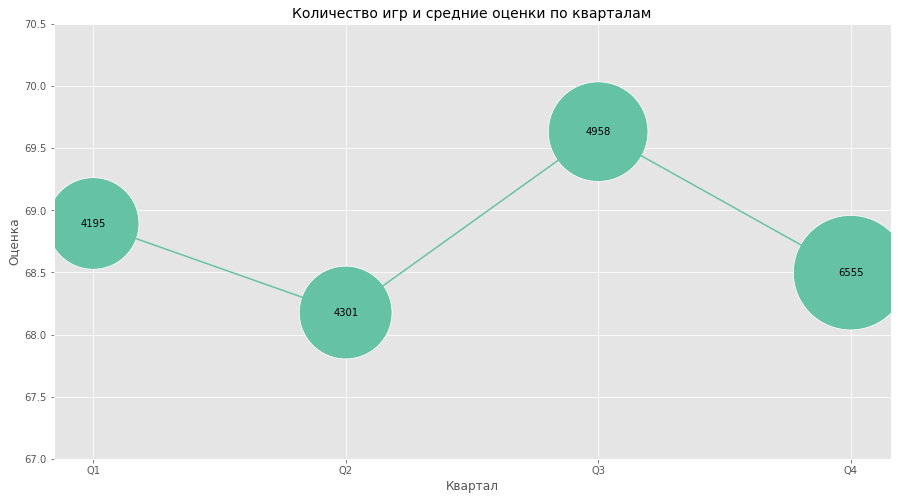

In [17]:
# Построение графиков количества игр и средних оценок по кварталам
df = games.groupby(games['release_date'].dt.quarter).agg({'title': 'count', 'critic_score': 'mean'})
plt.figure(figsize=(15, 8))
g_1 = sns.scatterplot(x=df.index, y='critic_score', s=df['title'] * 2, data=df)
g_2 = sns.lineplot(x=df.index, y='critic_score', data=df)
plt.xticks((np.arange(1, 5)), labels=['Q1', 'Q2', 'Q3', 'Q4']);
plt.yticks((np.arange(67, 71, step=0.5)));
plt.xlabel("Квартал");
plt.ylabel("Оценка");
plt.title("Количество игр и средние оценки по кварталам", {'fontsize': 14});

for index, row in df.iterrows():
    g_1.text(x=index, horizontalalignment='center', verticalalignment='center', 
           y=row['critic_score'], s=str(int(row['title'])))

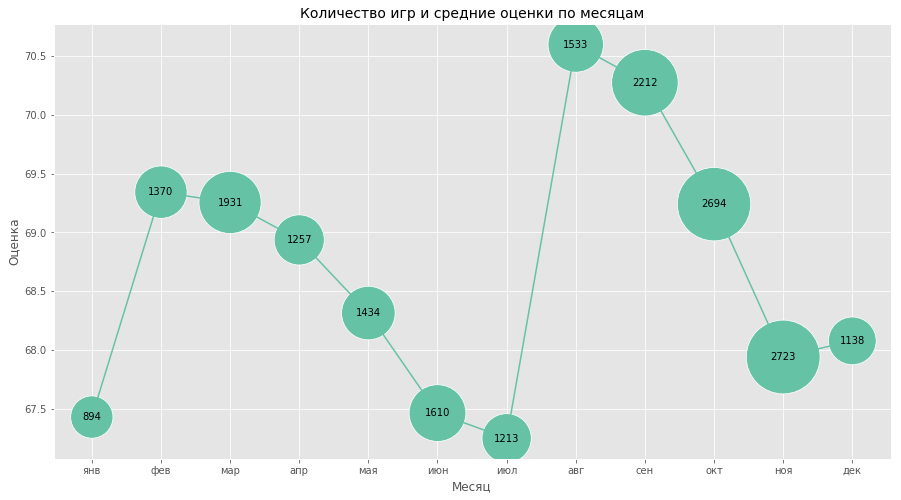

In [18]:
# Построение графиков количества игр и средних оценок по месяцам
df = games.groupby(games['release_date'].dt.month).agg({'title': 'count', 'critic_score': 'mean'})
plt.figure(figsize=(15, 8))
g_1 = sns.scatterplot(x=df.index, y='critic_score', s=df['title'] * 2, data=df)
g_2 = sns.lineplot(x=df.index, y='critic_score', data=df)
plt.xticks((np.arange(1, 13)), labels=list(calendar.month_abbr[1:]));
plt.xlabel("Месяц");
plt.ylabel("Оценка");
plt.title("Количество игр и средние оценки по месяцам", {'fontsize': 14});

for index, row in df.iterrows():
    g_1.text(x=index, horizontalalignment='center', verticalalignment='center', 
           y=row['critic_score'], s=str(int(row['title'])))

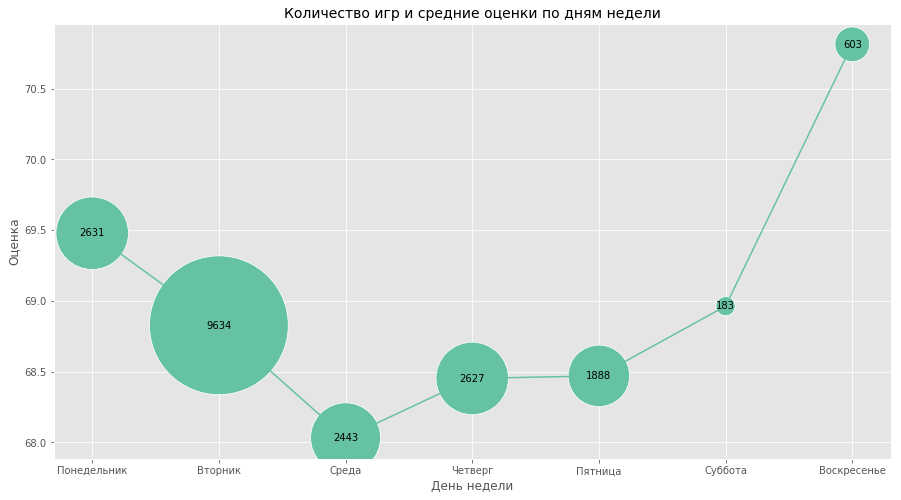

In [19]:
# Построение графиков количества игр и средних оценок по дням недели
df = games.groupby(games['release_date'].dt.dayofweek).agg({'title': 'count', 'critic_score': 'mean'})
plt.figure(figsize=(15, 8))
g_1 = sns.scatterplot(x=df.index, y='critic_score', s=df['title'] * 2, data=df)
g_2 = sns.lineplot(x=df.index, y='critic_score', data=df)
plt.xticks((np.arange(0, 7)), labels=list(calendar.day_name));
plt.xlabel("День недели");
plt.ylabel("Оценка");
plt.title("Количество игр и средние оценки по дням недели", {'fontsize': 14});

for index, row in df.iterrows():
    g_1.text(x=index, horizontalalignment='center', verticalalignment='center', 
           y=row['critic_score'], s=str(int(row['title'])))

## 3.3. Поколения консолей

In [20]:
df = games.groupby('generation').agg({'title': 'count', 'critic_score': 'mean', 'user_score': 'mean', 'year': ['min', 'max']})
df.rename_axis(columns_ru[df.index.name], inplace=True)
df.columns = ['Количество игр', 'Средняя оценка', 'Средняя оценка (пользов.)', 'Дата начала', 'Дата окончания']
df.apply(lambda x: round(x, 2))

,Количество игр,Средняя оценка,Средняя оценка (пользов.),Дата начала,Дата окончания
Поколение,,,,,
5,345,70.78,77.12,1995,2003
6,3623,68.29,75.09,1999,2010
7,5769,66.87,68.74,2004,2016
8,4851,69.79,66.39,2011,2018
PC,5421,70.15,68.82,1994,2018


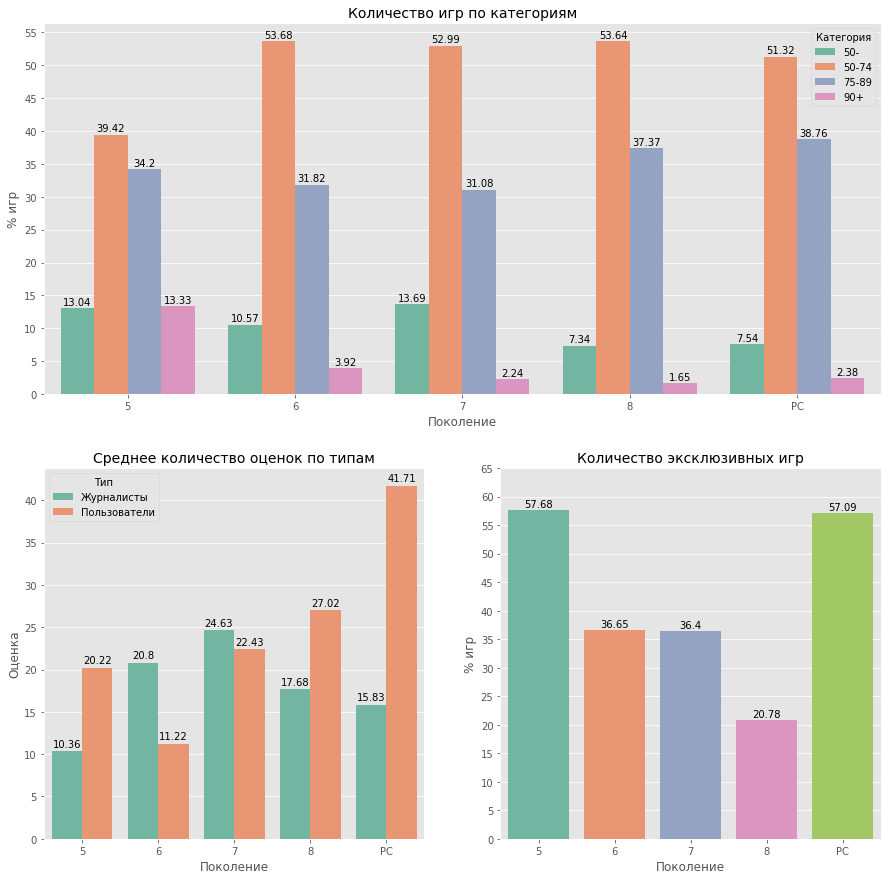

In [21]:
gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(15, 15))

# Построение графика категорий игр
df = games['category'].groupby(games['generation']) \
                    .value_counts(normalize=True).apply(lambda x: round(x * 100, 2)).rename('games', axis=1) \
                    .reset_index().sort_values(['generation', 'category'])
ax = plt.subplot(gs[0, :])
g = sns.barplot(x='generation', y='games', hue='category', data=df);
plt.yticks((np.arange(0, 60, step=5)));
plt.xlabel("Поколение");
plt.ylabel("% игр");
plt.title("Количество игр по категориям", {'fontsize': 14});
plt.legend(title='Категория', loc=0);

for p in g.patches:
    height = p.get_height()
    g.text(x=p.get_x() + p.get_width() / 2, horizontalalignment='center', y=height + 0.5, s=str(height))

# Построение графика числа оценок
df = games.groupby('generation').agg({'critic_count': 'mean', 'user_count': 'mean'}).apply(lambda x: round(x, 2)) \
                                .rename(columns={'critic_count': 'Журналисты', 'user_count': 'Пользователи'}) \
                                .unstack().reset_index().rename({'level_0': 'type', 0: 'score'}, axis=1)
ax = plt.subplot(gs[1, 0])
g = sns.barplot(x='generation', y='score', hue='type', data=df)
plt.xlabel("Поколение");
plt.ylabel("Оценка");
plt.title("Среднее количество оценок по типам", {'fontsize': 14});
plt.legend(title='Тип', loc=0);

for p in g.patches:
    height = p.get_height()
    g.text(x=p.get_x() + p.get_width() / 2, horizontalalignment='center', y=height + 0.5, s=str(height))

# Построение графика эксклюзивности игр
df = games['is_exclusive'].groupby(games['generation']).value_counts(normalize=True)
df = df.iloc[df.index.get_level_values('is_exclusive') == 1].apply(lambda x: round(x * 100, 2)) \
                        .reset_index(level=1, drop=True).reset_index()
ax = plt.subplot(gs[1, 1])
g = sns.barplot(x='generation', y='is_exclusive', data=df);
plt.yticks((np.arange(0, 70, step=5)));
plt.xlabel("Поколение");
plt.ylabel("% игр");
plt.title("Количество эксклюзивных игр", {'fontsize': 14});

for index, value in enumerate(df['is_exclusive'].values):
    g.text(x=index, horizontalalignment='center', y=value + 0.5, s=str(value))

## 3.4. Платформы

In [22]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

In [23]:
df = games.groupby('platform').agg({'title': 'count', 'is_exclusive': 'sum', 'critic_score': 'mean', 
                                    'user_score': 'mean', 'year': ['min', 'max']}).apply(lambda x: round(x, 2))
df.rename_axis(columns_ru[df.index.name], inplace=True)
df['exclusive_perc'] = (df[('is_exclusive', 'sum')] / df[('title', 'count')]) \
                        .apply(lambda x: '{}%'.format(round(x * 100, 2)))
df['delta_score'] = df['critic_score'] - df['user_score']
df['duration'] = df[('year', 'max')] - df[('year', 'min')]
cols = df.columns.tolist()
cols.insert(2, cols.pop(cols.index(('exclusive_perc', ''))))
cols.insert(5, cols.pop(cols.index(('delta_score', ''))))
df = df[cols]
df.columns = pd.MultiIndex.from_tuples([('Количество игр', 'Всего'), ('Количество игр', 'Эксклюзивы'), ('Количество игр', '%'),
                                       ('Средняя оценка', 'Журналисты'), ('Средняя оценка', 'Пользователи'), ('Средняя оценка', '+/-'),
                                       ('Активный период', 'Начало'), ('Активный период', 'Конец'), ('Активный период', '+/-')])
df.style.apply(highlight_max, subset=df.columns[0:6]).apply(highlight_min, subset=df.columns[0:6])

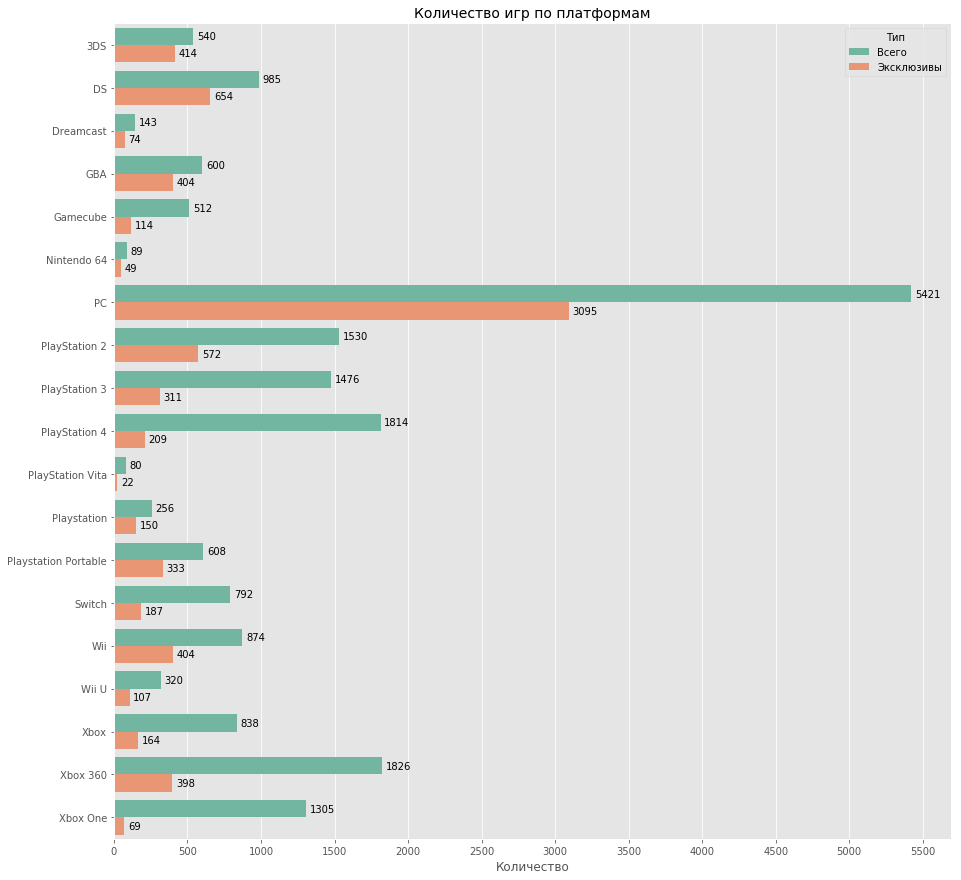

In [24]:
# Построение графика количества игр
df = pd.DataFrame(games.groupby('platform').size()).rename({0: 'games'}, axis=1)
df['is_exclusive'] = games.groupby(['platform']).agg({'is_exclusive': 'sum'})
df = df.rename(columns={'games': 'Всего', 'is_exclusive': 'Эксклюзивы'}) \
        .stack().reset_index().rename({'level_1': 'type', 0: 'games'}, axis=1)
plt.figure(figsize=(15, 15))
g = sns.barplot(x='games', y='platform', hue='type', data=df, orient='h', palette='Set2');
plt.xticks((np.arange(0, 6000, step=500)));
plt.xlabel("Количество");
plt.ylabel(None);
plt.title("Количество игр по платформам", {'fontsize': 14});
plt.legend(title='Тип', loc=0);

for p in g.patches:
    width = p.get_width()
    g.text(x=width + 25, y=p.get_y() + p.get_height() / 2, verticalalignment='center', s=str(int(width)))

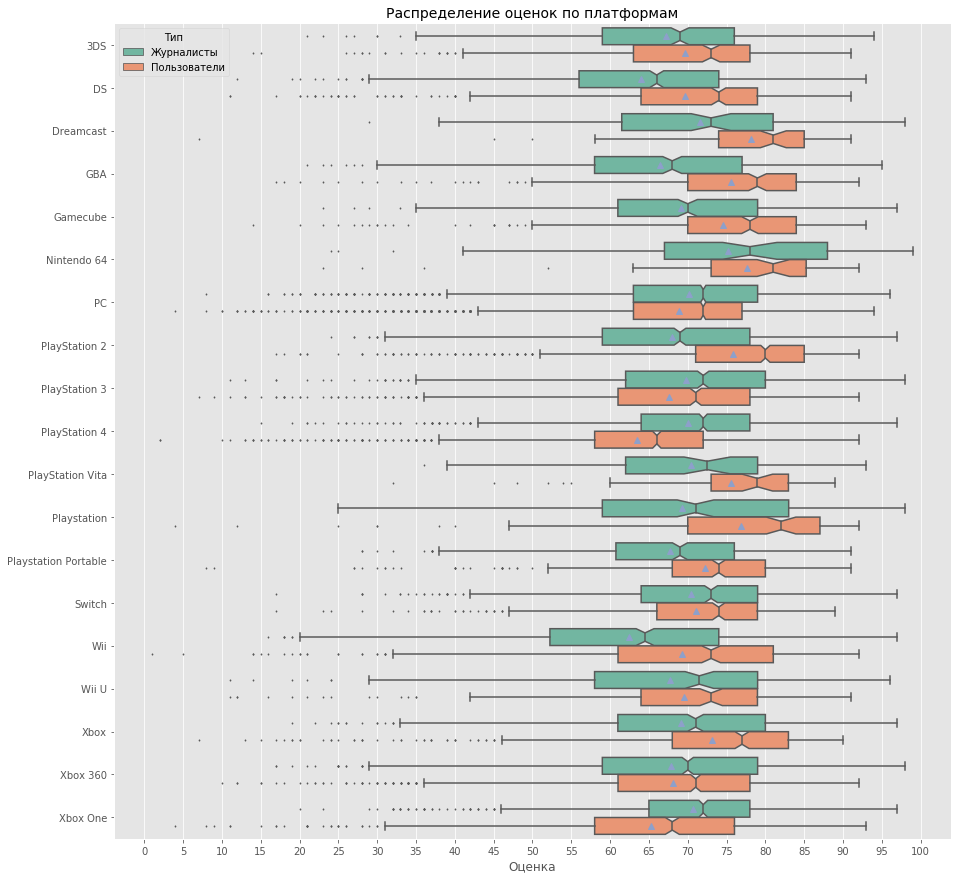

In [25]:
# Построение распределения оценок по платформам
df = games[['platform', 'critic_score', 'user_score']].sort_values('platform') \
                            .rename(columns={'critic_score': 'Журналисты', 'user_score': 'Пользователи'}) \
                            .set_index('platform').stack().reset_index() \
                            .rename({'level_1': 'type', 0: 'score'}, axis=1)
plt.figure(figsize=(15, 15)) 
g = sns.boxplot(x='score', y='platform', hue='type', data=df, orient='h', notch=True, 
                showmeans=True, fliersize=1, palette='Set2');
plt.xticks((np.arange(0, 105, step=5)));
plt.xlabel("Оценка");
plt.ylabel(None);
plt.title("Распределение оценок по платформам", {'fontsize': 14});
plt.legend(title='Тип', loc=2);

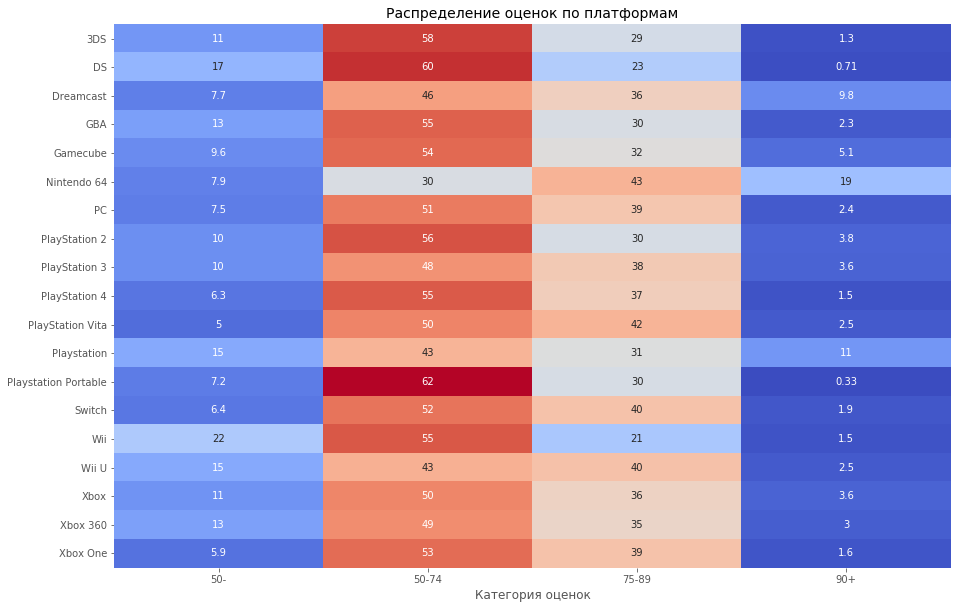

In [26]:
# Построение карты оценок
df = games['category'].groupby(games['platform']).value_counts(normalize=True) \
                    .apply(lambda x: round(x * 100, 2)).rename('games', axis=1) \
                    .reset_index().pivot(index='platform', columns='category', values='games')
plt.figure(figsize=(15, 10)) 
sns.heatmap(df, annot=True, cmap='coolwarm', cbar=False)
plt.xlabel("Категория оценок");
plt.ylabel(None);
plt.title("Распределение оценок по платформам", {'fontsize': 14});

In [27]:
# Топ-5 игр для каждой платформы
df = pd.DataFrame()
for platform in sorted(games['platform'].unique()):
    df[platform] = games.query('platform == \'' + platform + '\'').sort_values('critic_score', ascending=False) \
                        .head(5).reset_index(drop=True)[['title', 'critic_score']] \
                        .apply(lambda x: '{} - {}'.format(x[0], x[1]), axis=1)
df.index += 1
df.T

,1,2,3,4,5
3DS,The Legend of Zelda: Ocarina of Time 3D - 94,Cave Story - 93,Fire Emblem: Awakening - 92,The Legend of Zelda: A Link Between Worlds - 91,Super Mario 3D Land - 90
DS,Grand Theft Auto: Chinatown Wars - 93,Flipnote Studio - 93,Chrono Trigger - 92,Mario Kart DS - 91,Advance Wars: Dual Strike - 90
Dreamcast,SoulCalibur - 98,NFL 2K1 - 97,Tony Hawk's Pro Skater 2 - 97,Jet Grind Radio - 94,NBA 2K2 - 93
GBA,Tony Hawk's Pro Skater 2 - 95,The Legend of Zelda: A Link to the Past - 95,Super Mario Advance 4: Super Mario Bros. 3 - 94,Mario Kart Super Circuit - 93,Metroid Fusion - 92
Gamecube,Metroid Prime - 97,The Legend of Zelda: Twilight Princess - 96,Resident Evil 4 - 96,The Legend of Zelda: The Wind Waker - 96,The Legend of Zelda Collector's Edition - 95
Nintendo 64,The Legend of Zelda: Ocarina of Time - 99,Perfect Dark - 97,GoldenEye 007 - 96,The Legend of Zelda: Majora's Mask - 95,Super Mario 64 - 94
PC,Out of the Park Baseball 2007 - 96,The Orange Box - 96,Grand Theft Auto V - 96,Half-Life 2 - 96,Half-Life - 96
PlayStation 2,Grand Theft Auto III - 97,Tony Hawk's Pro Skater 3 - 97,Resident Evil 4 - 96,Metal Gear Solid 2: Sons of Liberty - 96,Madden NFL 2003 - 95
PlayStation 3,Grand Theft Auto IV - 98,Grand Theft Auto V - 97,Batman: Arkham City - 96,Uncharted 2: Among Thieves - 96,The Last of Us - 95
PlayStation 4,Grand Theft Auto V - 97,Red Dead Redemption 2 - 97,The Last of Us Remastered - 95,XCOM 2: War of the Chosen - 94,God of War - 94


## 3.5. Издатели

In [28]:
top_publishers = games.groupby('publisher').size().sort_values(ascending=False)
top_publishers = top_publishers[top_publishers > 10].index

In [29]:
def get_top_game_by_publisher(publisher, score_type, worse):
    game = games.query('publisher == "' + publisher +'"') \
                .sort_values(score_type, ascending=worse).head(1)[['title', score_type]] \
                .apply(lambda x: '{} - {}'.format(x[0], x[1]), axis=1)
    return game.values[0]

In [30]:
# Топ-20 лучших издателей по версии журналистов
df = games[games['publisher'].isin(top_publishers)].groupby('publisher') \
            .agg({'critic_score': 'mean', 'title': 'count'}).sort_values('critic_score', ascending=False) \
            .reset_index().head(20).rename(columns=columns_ru).rename({'Наименование': 'Количество игр'}, axis=1)
df['Лучшая игра'] = df['Издатель'].apply(get_top_game_by_publisher, score_type='critic_score', worse=False)
df.index += 1
df

,Издатель,Оценка,Количество игр,Лучшая игра
1,Square Electronic Arts,85.166667,12,Chrono Cross - 94
2,Blizzard Entertainment,85.113636,44,Diablo - 94
3,DrinkBox Studios,84.466667,15,Guacamelee! Super Turbo Championship Edition - 90
4,Out Of The Park Developments,83.533333,15,Out of the Park Baseball 17 - 92
5,Valve Software,83.214286,14,Portal 2 - 95
6,Image & Form,83.000000,16,SteamWorld Heist: Ultimate Edition - 91
7,MTV Games,82.500000,18,Rock Band 3 - 93
8,Rockstar Games,81.907216,97,Grand Theft Auto IV - 98
9,Klei Entertainment,80.250000,12,Mark of the Ninja: Remastered - 89
10,Nicalis,78.937500,32,Cave Story - 93


In [31]:
# Топ-20 худших издателей по версии журналистов
df = games[games['publisher'].isin(top_publishers)].groupby('publisher') \
            .agg({'critic_score': 'mean', 'title': 'count'}).sort_values('critic_score') \
            .reset_index().head(20).rename(columns=columns_ru).rename({'Наименование': 'Количество игр'}, axis=1)
df['Худшая игра'] = df['Издатель'].apply(get_top_game_by_publisher, score_type='critic_score', worse=True)
df.index += 1
df

,Издатель,Оценка,Количество игр,Худшая игра
1,DSI Games,38.916667,24,Chicken Shoot - 19
2,Digital Leisure Inc.,40.250000,12,Dragon's Lair 3 - 23
3,Groove Games,46.166667,12,World War II Combat: Iwo Jima - 25
4,Maximum Games,48.735294,34,Rugby 15 - 19
5,Evolved Games,50.117647,17,Raven Squad: Operation Hidden Dagger - 38
6,UFO Interactive,52.400000,25,Anubis II - 19
7,TDK Mediactive,53.656250,32,Aquaman: Battle for Atlantis - 26
8,The Game Factory,54.500000,22,Biker Mice from Mars - 27
9,Destineer,54.947368,19,Homie Rollerz - 23
10,Global Star Software,55.037037,54,Charlie and the Chocolate Factory - 26


In [32]:
# Топ-20 лучших издателей по версии пользователей
df = games[games['publisher'].isin(top_publishers)].groupby('publisher') \
            .agg({'user_score': 'mean', 'title': 'count'}).sort_values('user_score', ascending=False) \
            .reset_index().head(20).rename(columns=columns_ru).rename({'Наименование': 'Количество игр'}, axis=1)
df['Лучшая игра'] = df['Издатель'].apply(get_top_game_by_publisher, score_type='user_score', worse=False)
df.index += 1
df

,Издатель,Оценка (пользов.),Количество игр,Лучшая игра
1,Square Electronic Arts,88.079167,12,Xenogears - 92.03
2,GT Interactive,82.627273,11,Unreal Tournament (1999) - 90.0
3,Working Designs,81.391000,13,Lunar 2: Eternal Blue Complete - 91.02
4,MumboJumbo,80.326667,12,Braid - 86.02
5,Zoo Games,80.012500,12,Auditorium HD - 86.02
6,Image & Form,79.194000,16,SteamWorld Dig 2 - 87.03
7,Interplay,78.513333,43,Baldur's Gate II: Shadows of Amn - 92.03
8,Koei,78.306053,81,Dynasty Warriors 4 - 90.0
9,Nintendo,78.112025,581,Metroid Prime - 92.03
10,Rockstar Games,77.984948,97,Bully - 90.0


In [33]:
# Топ-20 худших издателей по версии пользователей
df = games[games['publisher'].isin(top_publishers)].groupby('publisher') \
            .agg({'user_score': 'mean', 'title': 'count'}).sort_values('user_score') \
            .reset_index().head(20).rename(columns=columns_ru).rename({'Наименование': 'Количество игр'}, axis=1)
df.index += 1
df

,Издатель,Оценка (пользов.),Количество игр
1,Digital Leisure Inc.,39.431429,12
2,DSI Games,39.630909,24
3,Maximum Games,51.769615,34
4,Evolved Games,53.401333,17
5,EnjoyUp Games,53.548182,23
6,The Game Factory,54.903000,22
7,Wired Productions,55.333333,17
8,Wales Interactive Ltd.,55.773182,37
9,Frontier Developments,55.901818,12
10,Soedesco,56.208571,23


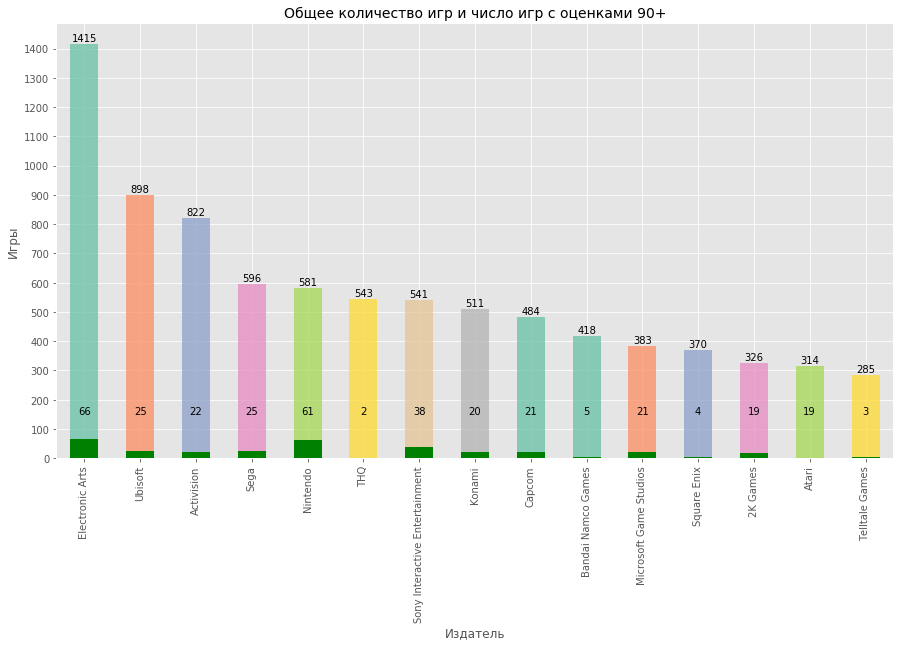

In [34]:
# Построение графика крупнейших издателей
df_1 = games.groupby('publisher').size().sort_values(ascending=False).head(15)
df_2 = games[(games['publisher'].isin(top_publishers[: 15])) & (games['category'] == '90+')] \
                                .groupby('publisher').size().replace(0, np.NaN).dropna()
plt.figure(figsize=(15, 8))
g_1 = df_1.plot(kind='bar', alpha=0.75)
g_2 = df_2[df_1.index].plot(kind='bar', color='green')
plt.yticks((np.arange(0, 1500, step=100)));
plt.xlabel("Издатель");
plt.ylabel("Игры");
plt.title("Общее количество игр и число игр с оценками 90+", {'fontsize': 14});

for index, value in enumerate(df_1.values):
    g_1.text(x=index, horizontalalignment='center', y=value + 10, s=str(value))
    g_2.text(x=index, horizontalalignment='center', y=150, s=str(int(df_2[df_1.index][index])))

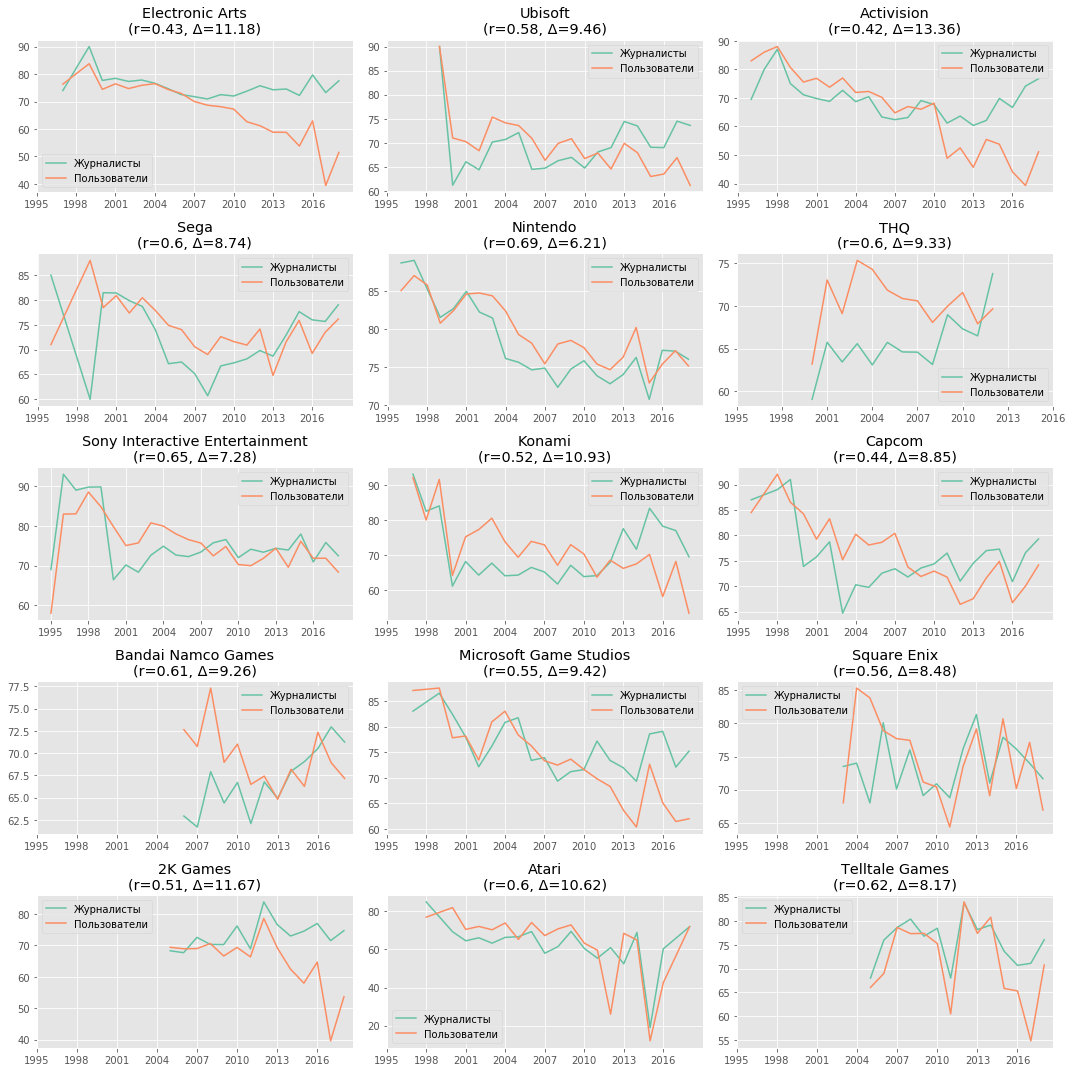

In [35]:
# Построение графиков оценок по годам для Топ-15 крупнейших издателей
df = games[games['publisher'].isin(top_publishers[: 15])]
df = df.groupby(['publisher', 'year']).agg({'critic_score': 'mean', 'user_score': 'mean'}).reset_index()
plt.figure(figsize=(15, 15))
for i, publisher in enumerate(top_publishers[: 15]):
    ax = plt.subplot(5, 3, i + 1)
    g_1 = sns.lineplot(x='year', y='critic_score', data=df.query('publisher == "' + publisher + '"'), label='Журналисты')
    g_2 = sns.lineplot(x='year', y='user_score', data=df.query('publisher == "' + publisher + '"'), label='Пользователи')
    df_2 = games[games['publisher'].isin(top_publishers[: 15])].query('publisher == "' + publisher + '"')[['critic_score', 'user_score']]
    corr_coef = round(df_2.corr().iloc[0:: 2, -1].values[0], 2)
    delta = round(np.abs(df_2['critic_score'] - df_2['user_score']).mean(), 2)
    plt.xticks((np.arange(1995, 2019, step=3)));
    plt.xlabel(None);
    plt.ylabel(None);
    plt.title(publisher + '\n(r=' + str(corr_coef) + ', Δ=' + str(delta) + ')')
    plt.legend()
plt.tight_layout()

In [36]:
# Топ-20 издателей с максимальным коэффициентом корреляции между оценками журналистов и пользователей
df = games[games['publisher'].isin(top_publishers)].groupby('publisher')[['critic_score', 'user_score']].corr().dropna()
df = df[~df['critic_score'].eq(1)].reset_index(1, drop=True)['critic_score'].rename('corr_coef') \
                    .reset_index().dropna().sort_values('corr_coef', ascending=False) \
                    .rename(columns=columns_ru).rename({'corr_coef': 'Коэффициент корреляции'}, axis=1) \
                    .head(20).reset_index(drop=True)
df.index += 1
df

,Издатель,Коэффициент корреляции
1,Flyhigh Works,0.993774
2,Double Fine Productions,0.910553
3,City Interactive,0.903321
4,bitComposer Games,0.899700
5,Mastiff,0.891648
6,Maximum Games,0.890610
7,Kemco,0.869142
8,Conspiracy Entertainment,0.867368
9,Jackbox Games Inc.,0.852461
10,Destineer,0.851307


In [37]:
# Топ-20 издателей с минимальным коэффициентом корреляции между оценками журналистов и пользователей
df = games[games['publisher'].isin(top_publishers)].groupby('publisher')[['critic_score', 'user_score']].corr().dropna()
df = df[~df['critic_score'].eq(1)].reset_index(1, drop=True)['critic_score'].rename('corr_coef') \
                    .reset_index().dropna().sort_values('corr_coef') \
                    .rename(columns=columns_ru).rename({'corr_coef': 'Коэффициент корреляции'}, axis=1) \
                    .head(20).reset_index(drop=True)
df.index += 1
df

,Издатель,Коэффициент корреляции
1,Teyon,-0.453633
2,Out Of The Park Developments,-0.341902
3,DrinkBox Studios,-0.188604
4,Milestone S.r.l,-0.148614
5,Matrix Games,-0.139327
6,Artifex Mundi,-0.114055
7,Buena Vista Games,-0.043885
8,Raw Fury,-0.032239
9,Headup Games,-0.002260
10,Frontier Developments,0.011898


## 3.6. Разработчики

In [38]:
top_developers = games.groupby('developer').size().sort_values(ascending=False)
top_developers = top_developers[top_developers > 5].index

In [39]:
def get_top_game_by_developer(developer, score_type, worse):
    game = games.query('developer == "' + developer +'"') \
                .sort_values(score_type, ascending=worse).head(1)[['title', score_type]] \
                .apply(lambda x: '{} - {}'.format(x[0], x[1]), axis=1)
    return game.values[0]

In [40]:
# Топ-20 лучших разработчиков по версии журналистов
df = games[games['developer'].isin(top_developers)].groupby('developer') \
            .agg({'critic_score': 'mean', 'title': 'count'}).sort_values('critic_score', ascending=False) \
            .reset_index().head(20).rename(columns=columns_ru).rename({'Наименование': 'Количество игр'}, axis=1)
df['Лучшая игра'] = df['Разработчик'].apply(get_top_game_by_developer, score_type='critic_score', worse=False)
df.index += 1
df

,Разработчик,Оценка,Количество игр,Лучшая игра
1,Rockstar North,90.363636,22,Grand Theft Auto IV - 98
2,Retro Studios,89.428571,7,Metroid Prime - 97
3,PLAYDEAD,88.666667,9,INSIDE - 93
4,Naughty Dog,88.571429,14,Uncharted 2: Among Thieves - 96
5,SCE Santa Monica,88.333333,6,God of War - 94
6,CD Projekt Red Studio,88.000000,17,The Witcher 3: Wild Hunt - Blood and Wine - 94
7,Yacht Club Games,87.444444,9,Shovel Knight: Treasure Trove - 91
8,Turn 10,86.714286,7,Forza Motorsport 3 - 92
9,Valve Software,86.214286,28,The Orange Box - 96
10,Blizzard Entertainment,85.846154,39,Diablo - 94


In [41]:
# Топ-20 худших разработчиков по версии журналистов
df = games[games['developer'].isin(top_developers)].groupby('developer') \
            .agg({'critic_score': 'mean', 'title': 'count'}).sort_values('critic_score') \
            .reset_index().head(20).rename(columns=columns_ru).rename({'Наименование': 'Количество игр'}, axis=1)
df['Худшая игра'] = df['Разработчик'].apply(get_top_game_by_developer, score_type='critic_score', worse=True)
df.index += 1
df

,Разработчик,Оценка,Количество игр,Худшая игра
1,Nordcurrent,32.166667,6,101-in-1 Explosive Megamix - 16
2,Hoplite Research,37.285714,7,Jett Tailfin - 21
3,Digital Leisure Inc.,40.583333,12,Dragon's Lair 3 - 23
4,Teyon,41.375000,8,Rambo: The Video Game - 23
5,UFO Interactive,43.833333,6,Samurai G - 36
6,49Games,45.333333,9,Torino 2006 - the Official Video Game of the X...
7,D3Publisher,45.833333,6,Tennis - 28
8,ZootFly,45.875000,8,The Expendables 2 Videogame - 32
9,Maximum Games,47.153846,13,Road Rage - 26
10,Frozen Codebase,47.500000,6,Kick-Ass - 33


In [42]:
# Топ-20 лучших разработчиков по версии пользователей
df = games[games['developer'].isin(top_developers)].groupby('developer') \
            .agg({'user_score': 'mean', 'title': 'count'}).sort_values('user_score', ascending=False) \
            .reset_index().head(20).rename(columns=columns_ru).rename({'Наименование': 'Количество игр'}, axis=1)
df['Лучшая игра'] = df['Разработчик'].apply(get_top_game_by_developer, score_type='user_score', worse=False)
df.index += 1
df

,Разработчик,Оценка (пользов.),Количество игр,Лучшая игра
1,Retro Studios,89.150000,7,Metroid Prime - 92.03
2,CD Projekt Red Studio,86.114118,17,The Witcher 3: Wild Hunt - 93.98
3,SCE Santa Monica,85.990000,6,God of War - 91.02
4,Alphadream Corporation,85.495000,6,Mario & Luigi: Superstar Saga - 90.0
5,Monolith Soft,85.189091,11,Xenoblade Chronicles - 92.03
6,SquareSoft,84.753750,17,Final Fantasy Tactics - 92.03
7,Black Isle Studios,84.365000,8,Planescape: Torment - 92.03
8,Naughty Dog,84.215714,14,The Last of Us - 92.03
9,Westwood Studios,83.987778,9,Command & Conquer - 88.98
10,ChunSoft,83.655556,9,"Nine Hours, Nine Persons, Nine Doors - 87.97"


In [43]:
# Топ-20 худших разработчиков по версии пользователей
df = games[games['developer'].isin(top_developers)].groupby('developer') \
            .agg({'user_score': 'mean', 'title': 'count'}).sort_values('user_score') \
            .reset_index().head(20).rename(columns=columns_ru).rename({'Наименование': 'Количество игр'}, axis=1)
df.index += 1
df

,Разработчик,Оценка (пользов.),Количество игр
1,HotGen,31.990000,7
2,Black Lantern Studios,31.997500,15
3,Hoplite Research,34.800000,7
4,Razorback Developments,35.000000,6
5,Nordcurrent,35.000000,6
6,Frontier Developments,37.262353,35
7,Crave,38.161667,16
8,Teyon,38.990000,8
9,Bungie,39.532353,17
10,Digital Leisure Inc.,41.144286,12


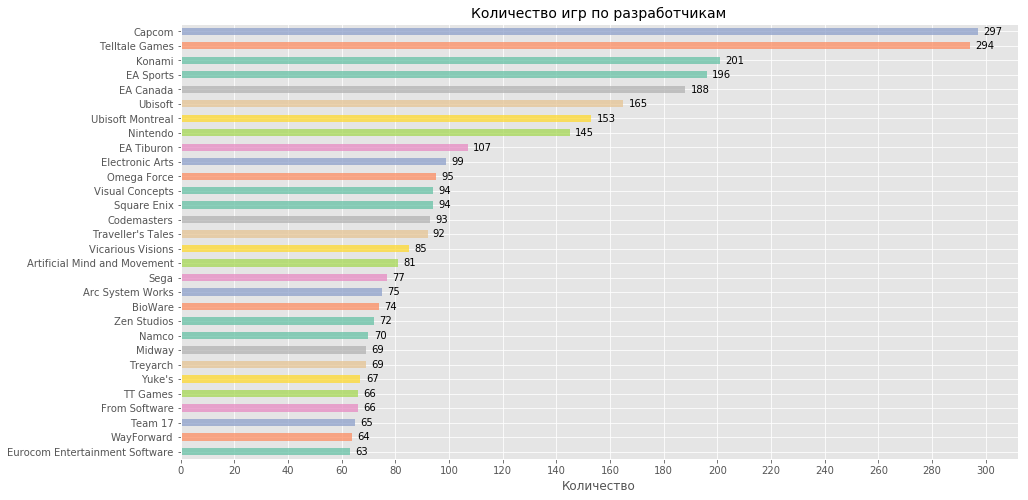

In [44]:
# Построение графика крупнейших разработчиков
df = games.groupby('developer').size().sort_values(ascending=False).head(30).sort_values()
plt.figure(figsize=(15, 8))
g = df.plot(kind='barh', alpha=0.75)
plt.xticks((np.arange(0, 320, step=20)));
plt.xlabel("Количество");
plt.ylabel(None);
plt.title("Количество игр по разработчикам", {'fontsize': 14});

for index, value in enumerate(df.values):
    g.text(x=value + 2, verticalalignment='center', y=index, s=str(value))

In [45]:
best_developers = games[games['developer'].isin(top_developers)].groupby('developer') \
            .agg({'critic_score': 'mean'}).sort_values('critic_score', ascending=False) \
            .reset_index().head(15)['developer'].values

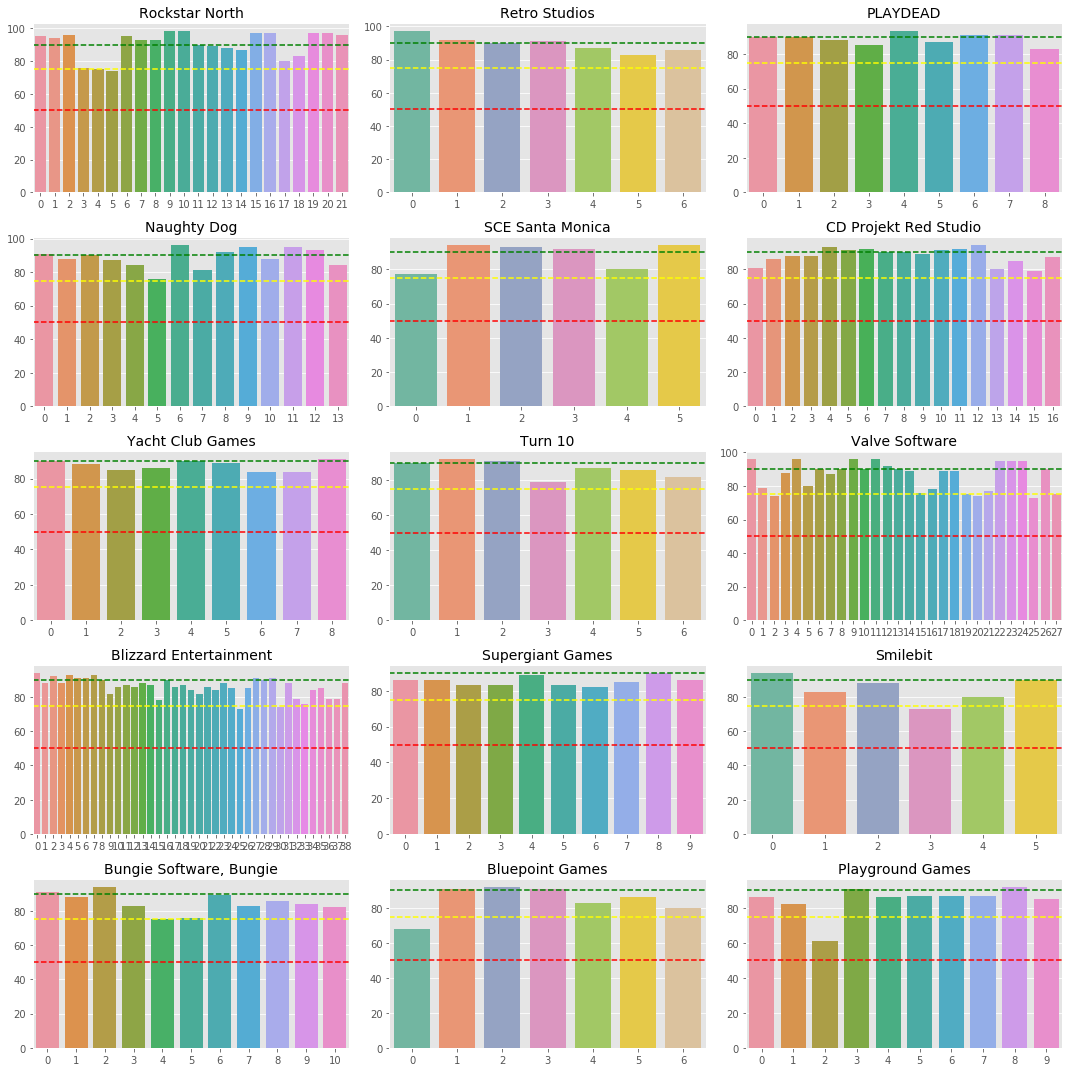

In [46]:
# Построение графиков оценок по релизам для Топ-15 лучших разработчиков
df_1 = games[games['developer'].isin(best_developers)]
plt.figure(figsize=(15, 15))
for i, developer in enumerate(best_developers):
    ax = plt.subplot(5, 3, i + 1)
    df_2 = df_1.query('developer == "' + developer + '"').sort_values('release_date')[['critic_score']].reset_index(drop=True)
    g = sns.barplot(x=df_2.index, y='critic_score', data=df_2);
    plt.axhline(y=90, c='green', linestyle='dashed');
    plt.axhline(y=75, c='yellow', linestyle='dashed');
    plt.axhline(y=50, c='red', linestyle='dashed');
    plt.xlabel(None);
    plt.ylabel(None);
    plt.title(developer, {'fontsize': 14});
plt.tight_layout()

## 3.7. Возрастной рейтинг

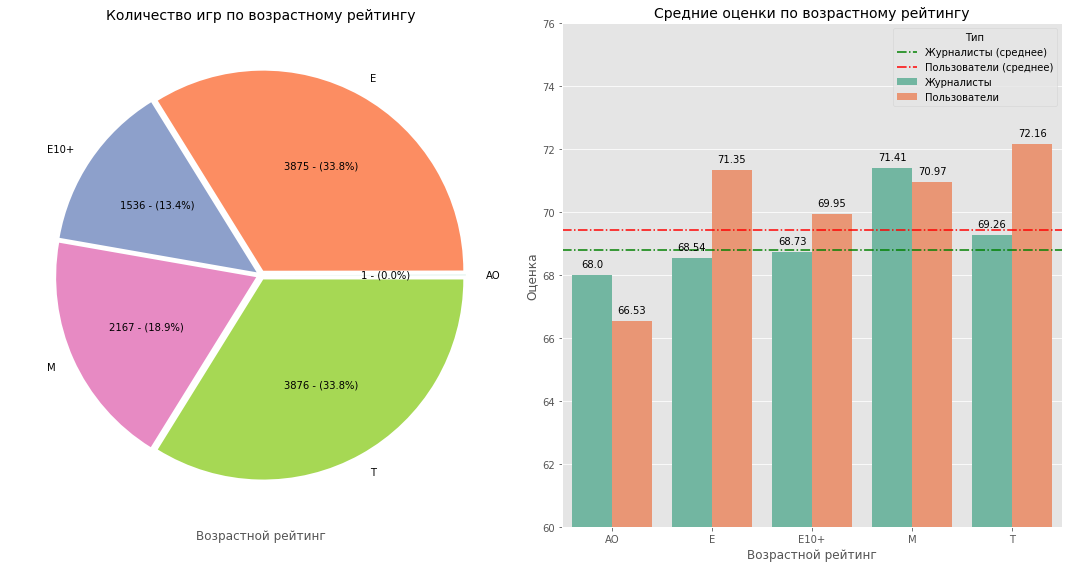

In [47]:
# Построение графика числа оценок по возрастному рейтингу
df = games.groupby('rating').size()
plt.figure(figsize=(15, 8))
g_1 = df.plot(kind='pie', explode=[0.025] * df.shape[0],
              autopct=lambda x: "{:d} - ({:.1f}%)".format(int(x / 100 * np.sum(df.values)), x), 
              ax=plt.subplot(1, 2, 1))
plt.xlabel("Возрастной рейтинг");
plt.ylabel(None);
plt.title("Количество игр по возрастному рейтингу", {'fontsize': 14});

# Построение графика оценок по возрастному рейтингу
df = games.groupby('rating').agg({'critic_score': 'mean', 'user_score': 'mean'}).apply(lambda x: round(x, 2)) \
                                .rename(columns={'critic_score': 'Журналисты', 'user_score': 'Пользователи'}) \
                                .unstack().reset_index().rename({'level_0': 'type', 0: 'score'}, axis=1)
g_2 = sns.barplot(x='rating', y='score', hue='type', data=df, ax=plt.subplot(1, 2, 2))
plt.yticks((np.arange(60, 80, step=2)));
plt.ylim(60, 76);
plt.xlabel("Возрастной рейтинг");
plt.ylabel("Оценка");
plt.title("Средние оценки по возрастному рейтингу", {'fontsize': 14});

for p in g_2.patches:
    height = p.get_height()
    g_2.text(x=p.get_x() + p.get_width() / 2, horizontalalignment='center', y=height + 0.25, s=str(height))
    
plt.axhline(y=games['critic_score'].mean(), c='green', linestyle='-.', label='Журналисты (среднее)');
plt.axhline(y=games['user_score'].mean(), c='red', linestyle='-.', label='Пользователи (среднее)');
plt.legend(title='Тип', loc=0);
plt.tight_layout()

## 3.8. Количество игроков

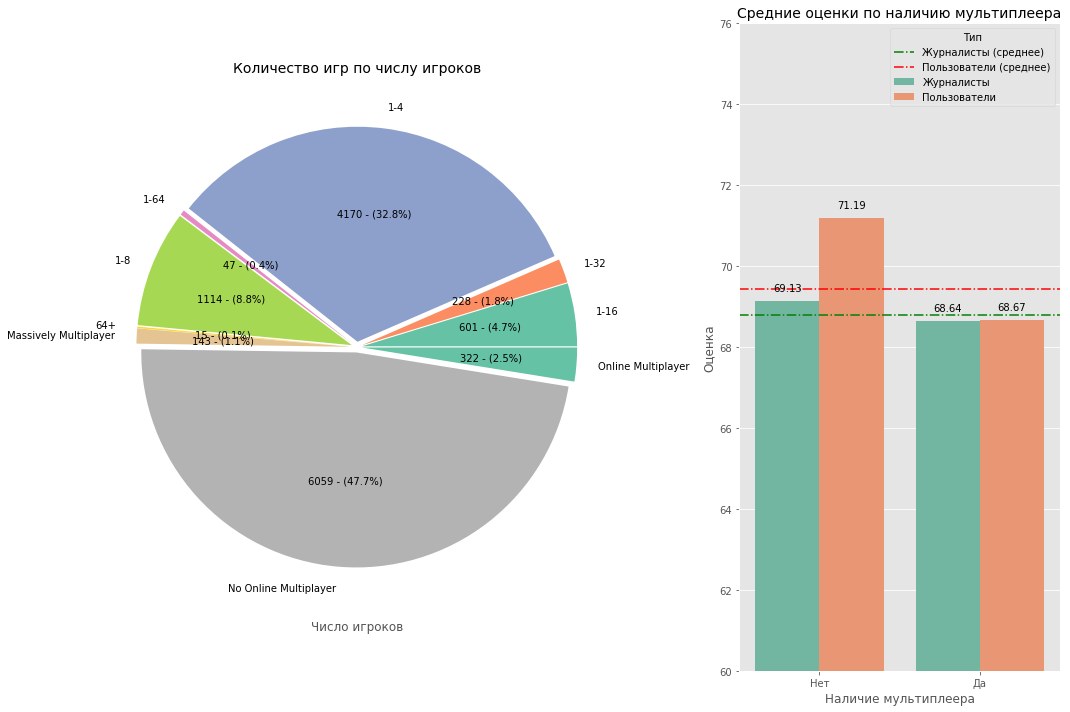

In [48]:
gs = gridspec.GridSpec(1, 5)
plt.figure(figsize=(15, 10))

# Построение графика количества игр по числу игроков
df = games.groupby('players').size()
g_1 = df.plot(kind='pie', explode=[0.025] * df.shape[0],
              autopct=lambda x: "{:d} - ({:.1f}%)".format(int(x / 100 * np.sum(df.values)), x), 
              ax=plt.subplot(gs[0, :3]))
plt.xlabel("Число игроков");
plt.ylabel(None);
plt.title("Количество игр по числу игроков", {'fontsize': 14});

# Построение графика оценок по наличию мультиплеера
df = games.groupby(games['players'] != 'No Online Multiplayer').agg({'critic_score': 'mean', 'user_score': 'mean'}) \
                                .apply(lambda x: round(x, 2)) \
                                .rename(columns={'critic_score': 'Журналисты', 'user_score': 'Пользователи'}) \
                                .unstack().reset_index().rename({'level_0': 'type', 0: 'score'}, axis=1) \
                                .replace({False: 'Нет', True: 'Да'})
g_2 = sns.barplot(x='players', y='score', hue='type', data=df, ax=plt.subplot(gs[0, 3:]))
plt.yticks((np.arange(60, 80, step=2)));
plt.ylim(60, 76);
plt.xlabel("Наличие мультиплеера");
plt.ylabel("Оценка");
plt.title("Средние оценки по наличию мультиплеера", {'fontsize': 14});

for p in g_2.patches:
    height = p.get_height()
    g_2.text(x=p.get_x() + p.get_width() / 2, horizontalalignment='center', y=height + 0.25, s=str(height))
    
plt.axhline(y=games['critic_score'].mean(), c='green', linestyle='-.', label='Журналисты (среднее)');
plt.axhline(y=games['user_score'].mean(), c='red', linestyle='-.', label='Пользователи (среднее)');
plt.legend(title='Тип', loc=0);
plt.tight_layout()

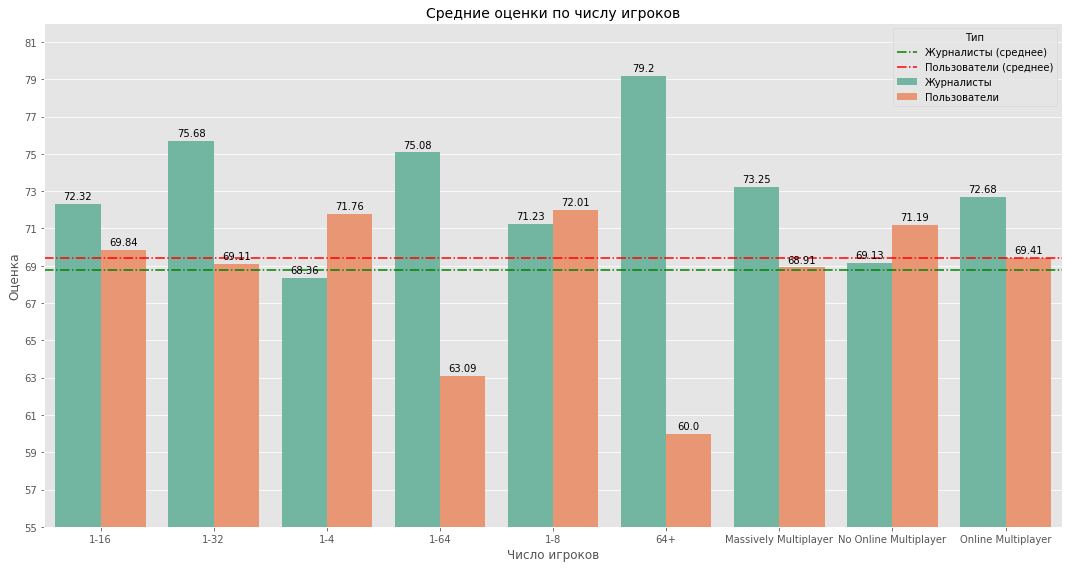

In [49]:
# Построение графика оценок по количеству игроков
df = games.groupby('players').agg({'critic_score': 'mean', 'user_score': 'mean'}).apply(lambda x: round(x, 2)) \
                                .rename(columns={'critic_score': 'Журналисты', 'user_score': 'Пользователи'}) \
                                .unstack().reset_index().rename({'level_0': 'type', 0: 'score'}, axis=1)
plt.figure(figsize=(15, 8))
g = sns.barplot(x='players', y='score', hue='type', data=df)
plt.yticks((np.arange(55, 82, step=2)));
plt.ylim(55, 82);
plt.xlabel("Число игроков");
plt.ylabel("Оценка");
plt.title("Средние оценки по числу игроков", {'fontsize': 14});

plt.tight_layout()

for p in g.patches:
    height = p.get_height()
    g.text(x=p.get_x() + p.get_width() / 2, horizontalalignment='center', y=height + 0.25, s=str(height))
    
plt.axhline(y=games['critic_score'].mean(), c='green', linestyle='-.', label='Журналисты (среднее)');
plt.axhline(y=games['user_score'].mean(), c='red', linestyle='-.', label='Пользователи (среднее)');
plt.legend(title='Тип', loc=0);